In [1]:
import pandas as pd

In [2]:
games = pd.read_csv("data/SEASON_DATA.csv", index_col=0)


games.columns

Index(['y-m-d', 'GameID', 'Time_Min', 'Team', 'Opp', 'R', 'RA', 'total_wins',
       'total_losses', 'Total_Innings', 'Walkoff', 'Streaks', 'Rank', 'GB',
       'Attendance', 'champ_lev_index', 'is_day_game', 'is_night_game',
       'Outcome', 'Season', 'players_used', 'BatAge', 'R/G', 'G', 'PA', 'AB',
       'runs_scored', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF',
       'IBB', 'LOB', 'Unnamed: 0_x', 'PAge', 'RA/G_x', 'W', 'L', 'W-L%', 'ERA',
       'GS', 'GF', 'CG', 'tSho', 'cSho', 'SV', 'IP', 'ER', 'BK', 'WP', 'BF',
       'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W',
       'pitchers_used', 'runs_allowed', 'hits_allowed', 'hr_allowed',
       'walks_allowed', 'int_wlk_allowed', 'hbp_allowed', 'pitch_so',
       'pitch_LOB', 'Unnamed: 0_y', '#Fld', 'RA/G_y', 'DefEff', 'PO', 'A', 'E',
       'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rdrs/yr', 'Rgood', 'def_chances'],
      dtype='object')

In [3]:
del games["Unnamed: 0_x"]
del games["Unnamed: 0_y"]

games["Season_Wins"] = games["total_wins"].shift(+1)
games["Season_Loses"] = games["total_losses"].shift(+1)
games["previous_game_time"] = games["Time_Min"].shift(+1)
games["previous_runs_scored"] = games["R"].shift(+1)
games["previous_runs_allowed"] = games["RA"].shift(+1)
games["previous_innings_played"] = games["Total_Innings"].shift(+1)
games["current_streak"] = games["Streaks"].shift(+1)
games["rank"] = games["Rank"].shift(+1)
games["gb"] = games["GB"].shift(+1)
games["previous_attendance"] = games["Attendance"].shift(+1)

del games["total_wins"]
del games["total_losses"]
del games["Time_Min"]
del games["R"]
del games["RA"]
del games["Total_Innings"]
del games["Streaks"]
del games["Rank"]
del games["GB"]
del games["Attendance"]
del games["Walkoff"]
del games["Season"]

In [4]:
games = games.fillna(0)
games["y-m-d"] = pd.to_datetime(games["y-m-d"])
games["team_code"] = games["Team"].astype("category").cat.codes
games["opp_code"] = games["Opp"].astype("category").cat.codes

In [6]:
games = games[['y-m-d', 'GameID', 'team_code', 'opp_code', 'Season_Wins',
       'Season_Loses', 'previous_game_time', 'previous_runs_scored',
       'previous_runs_allowed', 'previous_innings_played', 'current_streak',
       'rank', 'gb', 'previous_attendance', 'champ_lev_index', 'is_day_game',
       'is_night_game', 'players_used', 'BatAge', 'R/G',
       'G', 'PA', 'AB', 'runs_scored', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP',
       'SH', 'SF', 'IBB', 'LOB', 'PAge', 'RA/G_x', 'W', 'L', 'W-L%', 'ERA',
       'GS', 'GF', 'CG', 'tSho', 'cSho', 'SV', 'IP', 'ER', 'BK', 'WP', 'BF',
       'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W',
       'pitchers_used', 'runs_allowed', 'hits_allowed', 'hr_allowed',
       'walks_allowed', 'int_wlk_allowed', 'hbp_allowed', 'pitch_so',
       'pitch_LOB', '#Fld', 'RA/G_y', 'DefEff', 'PO', 'A', 'E', 'DP', 'Fld%',
       'Rtot', 'Rtot/yr', 'Rdrs/yr', 'Rgood', 'def_chances', 'Outcome']]
games = games.copy()

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, min_samples_split=50, random_state=1)

train = games[games["y-m-d"] < '2022-01-01']
test = games[games["y-m-d"] > '2022-01-01']
predictors = ['Season_Wins', 'Season_Loses', 'current_streak', 'gb', 'BatAge', '3B',
       'SB', 'OBP', 'HBP', 'SH', 'SF', 'W-L%', 'tSho', 'ERA+', 'FIP', 'BB9',
       'pitchers_used', 'DefEff', 'Fld%', 'Rtot']

In [11]:
rf.fit(train[predictors], train["Outcome"])

RandomForestClassifier(min_samples_split=50, n_estimators=500, random_state=1)

In [12]:
preds = rf.predict(test[predictors])

In [13]:
from sklearn.metrics import accuracy_score

error = accuracy_score(test["Outcome"], preds)
error

0.5170781893004115

In [14]:
combined = pd.DataFrame(dict(actual=test["Outcome"], predicted=preds))

In [15]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,1498,932
1,1415,1015


<Axes: >

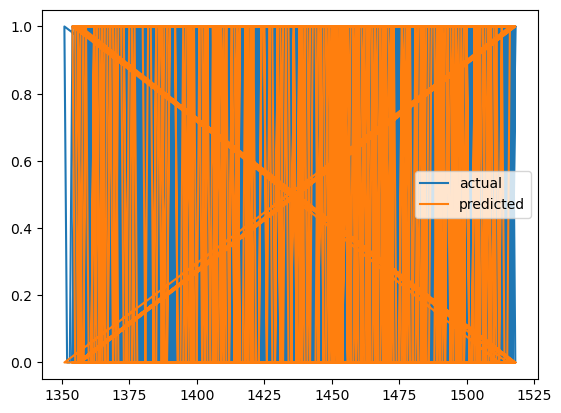

In [24]:
combined.plot()